# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from scipy.stats import pearsonr

df = pd.read_csv('launchcode.csv')
df.info(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635278 entries, 0 to 1635277
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   EIN            1635278 non-null  int64  
 1   NAME           1635278 non-null  object 
 2   CITY           1635278 non-null  object 
 3   STATE          1632858 non-null  object 
 4   ZIP            1635278 non-null  object 
 5   DEDUCTIBILITY  1635278 non-null  int64  
 6   FOUNDATION     1635278 non-null  int64  
 7   ACTIVITY       1635278 non-null  int64  
 8   ASSET_AMT      1282994 non-null  float64
 9   INCOME_AMT     1282994 non-null  float64
 10  REVENUE_AMT    1175724 non-null  float64
 11  NTEE_CD        976897 non-null   object 
 12  NTEE_Category  976876 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 162.2+ MB


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

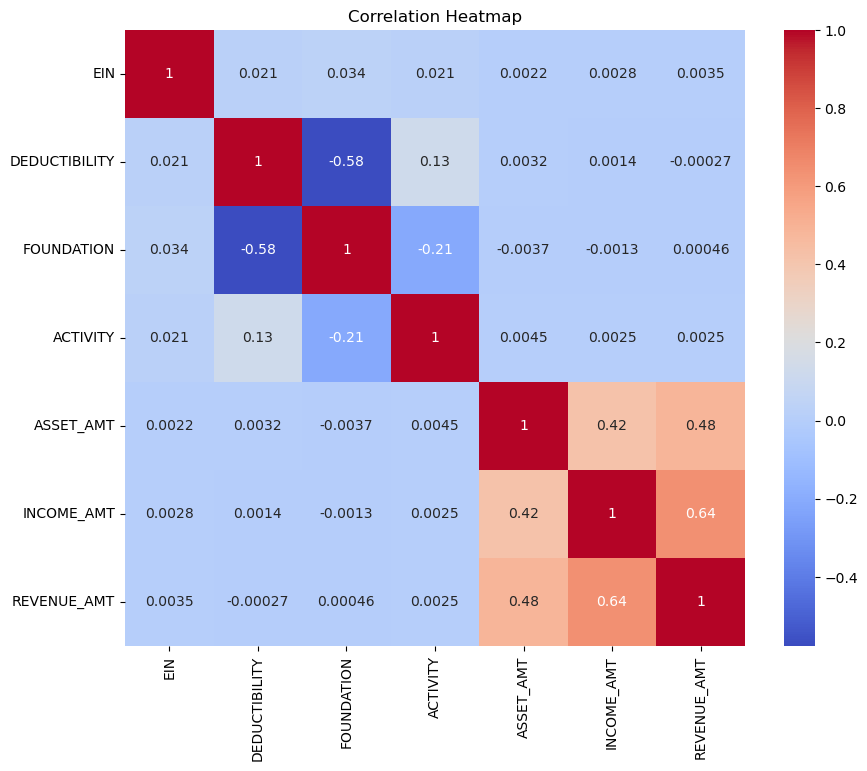

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the dataframe without non-numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Extract the required columns
column1 = df['INCOME_AMT']
column2 = df['REVENUE_AMT']

In [4]:
# Prepare the data for modeling by reshaping the data arrays into a suitable format
X = column1.values.reshape(-1, 1)
y = column2.values.reshape(-1, 1)

In [5]:
# Handle missing values by imputing with column mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = imputer.fit_transform(y)

In [6]:
# Create and train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [7]:
# Print out the model summary
print("Model Summary:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Model Summary:
Intercept: [1404708.51884205]
Coefficient: [[0.23657205]]


In [8]:
r_squared = model.score(X, y)
print(f"R-squared value: {r_squared}")

R-squared value: 0.3598793771535066


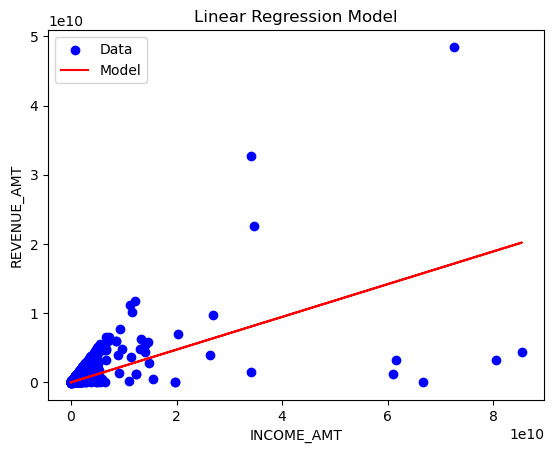

In [9]:
# Plot the column values and the line produced by the model
plt.scatter(X, y, color='b', label='Data')
plt.plot(X, model.predict(X), color='r', label='Model')
plt.xlabel('INCOME_AMT')
plt.ylabel('REVENUE_AMT')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

## Error Terms

Finally, plot your error terms!

/Users/allysonsummers/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


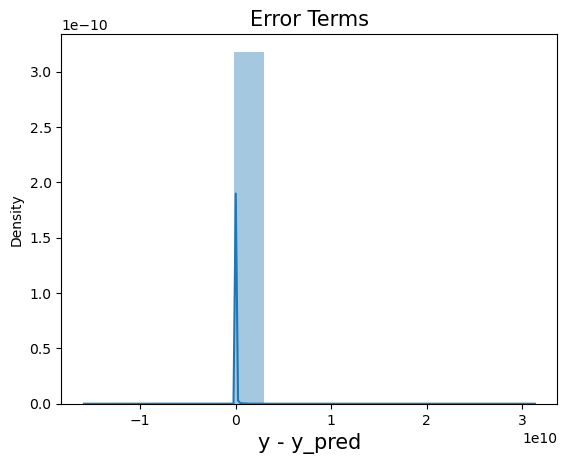

In [13]:
# Make predictions on the training data
y_pred = model.predict(X)

# Calculate the error terms
res = y - y_pred

# Plot the error terms
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y - y_pred', fontsize=15)
plt.show()


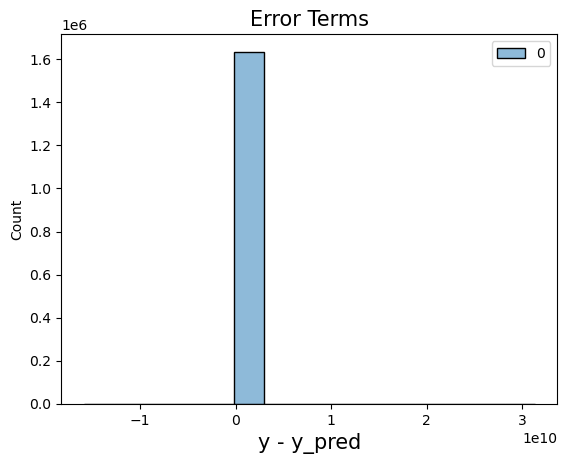

In [14]:
fig = plt.figure()
sns.histplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y - y_pred', fontsize=15)
plt.show()

##### Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.3598
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? Based on the results, the linear regression model was not particularly effective for predicting the target variable in this dataset. The R-squared value indicates that only 35.98% of the variance in the target variable is explained by the independent variables included in the model. Therefore, alternative predictive analysis methods should be considered.
3. Was your plot of the error terms a bell curve? The plot of the error terms did not exhibit a bell curve shape. A bell curve, also known as a normal distribution, would indicate that the errors are normally distributed around zero. However, the observed distribution of the error terms did not follow a symmetric bell-shaped pattern.